In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load data assuming CSV files are in the same directory
distribution_centers = pd.read_csv("./data/distribution_centers.csv")
events = pd.read_csv("./data/events.csv")
inventory_items = pd.read_csv("./data/inventory_items.csv")
order_items = pd.read_csv("./data/order_items.csv")
orders = pd.read_csv("./data/orders.csv")
products = pd.read_csv("./data/products.csv")
users = pd.read_csv("./data/users.csv")

In [49]:
events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase


### Traffic Sources:

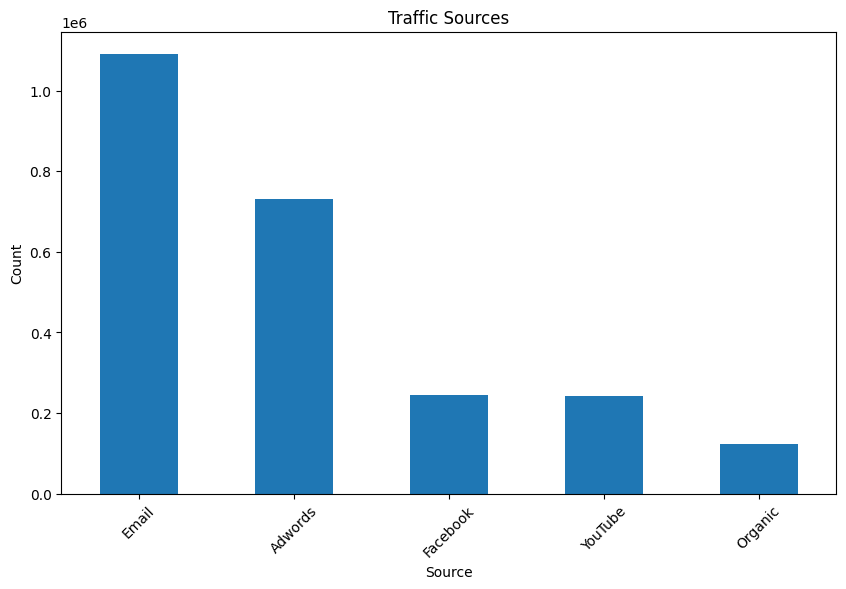

In [10]:
# Analyze traffic sources
traffic_sources = events['traffic_source'].value_counts()

# Display traffic sources
plt.figure(figsize=(10, 6))
traffic_sources.plot(kind='bar')
plt.title('Traffic Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Advertising Conversion Rates analysis

In [28]:
import pandas as pd
import plotly.express as px

# Calculate total events and purchase events for each traffic source
events_summary = events.groupby(['traffic_source', 'event_type']).size().unstack(fill_value=0)
events_summary['total_events'] = events_summary.sum(axis=1)

# Calculate conversion rate for each traffic source
events_summary['conversion_rate'] = (events_summary['purchase'] / events_summary['total_events']) * 100

# Sort by conversion rate in descending order
events_summary = events_summary.sort_values(by='conversion_rate', ascending=False).reset_index()

# Plotting bar chart
fig = px.bar(events_summary,
             x='traffic_source',
             y='purchase',
             color='traffic_source',
             text=[f'Conversion Rate: {rate:.2f}%' for rate in events_summary['conversion_rate']],
             labels=dict(traffic_source='Traffic Source', purchase='Total Purchase', text=''),
             height=650)

fig.update_traces(textposition='outside')
fig.update_layout(title_text='Traffic Source Performance by Conversion Rate')

fig.show()


### Event Types:


In [10]:
# Analyze event types
event_types = events['event_type'].value_counts()

# Display event types
print(event_types)

# Plotting event types
plt.figure(figsize=(10, 6))
event_types.plot(kind='bar')
plt.title('Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


event_type
product       845607
cart          595994
department    595323
purchase      181759
cancel        125568
home           87712
Name: count, dtype: int64


In [44]:
# Group the data by city and calculate user behavior metrics
city_stats = events.groupby('city').agg({
    'event_type': 'count',  # Total interactions
    'event_type': lambda x: (x == 'purchase').sum() / len(x)  # Purchase conversion rate
}).rename(columns={'event_type': 'conversion_rate'}).reset_index()

# Group the data by state and calculate user behavior metrics
state_stats = events.groupby('state').agg({
    'event_type': 'count',  # Total interactions
    'event_type': lambda x: (x == 'purchase').sum() / len(x)  # Purchase conversion rate
}).rename(columns={'event_type': 'conversion_rate'}).reset_index()


# Convert conversion rate to percentage
city_stats['conversion_rate'] = city_stats['conversion_rate'] * 100
state_stats['conversion_rate'] = state_stats['conversion_rate'] * 100

# Sort city_stats in descending order based on conversion_rate
city_stats = city_stats.sort_values(by='conversion_rate', ascending=False)

# Sort state_stats in descending order based on conversion_rate
state_stats = state_stats.sort_values(by='conversion_rate', ascending=False)


In [45]:
city_stats

,city,conversion_rate
3886,Kraainem,20.0
7189,Sivry-Rance,20.0
8727,Zuienkerke,20.0
5614,Onhaye,20.0
787,Bigga,20.0
...,...,...
2759,Geetbets,0.0
2764,Geloux,0.0
2767,Gembloux,0.0
2768,Genappe,0.0


In [46]:
state_stats

,state,conversion_rate
96,Iwate,12.698413
133,Nagasaki,10.638298
212,Vermont,10.588235
64,Gifu,9.954751
225,Yamaguchi,9.701493
...,...,...
45,Corse,5.357143
215,Vorarlberg,3.846154
134,Nara,0.000000
226,Yamanashi,0.000000


In [48]:
import plotly.express as px

# Plot top 10 cities based on conversion rate
top_10_cities = city_stats.head(20)
fig_city = px.bar(top_10_cities, x='city', y='conversion_rate', title='Top 10 Cities by Conversion Rate')
fig_city.show()

# Plot top 10 states based on conversion rate
top_10_states = state_stats.head(20)
fig_state = px.bar(top_10_states, x='state', y='conversion_rate', title='Top 10 States by Conversion Rate')
fig_state.show()


In [50]:
# Group the data by browser and calculate user behavior metrics
browser_stats = events.groupby('browser').agg({
    'event_type': 'count',  # Total interactions
    'event_type': lambda x: (x == 'purchase').sum() / len(x)  # Purchase conversion rate
}).rename(columns={'event_type': 'conversion_rate'}).reset_index()

# Convert conversion rate to percentage
browser_stats['conversion_rate'] = browser_stats['conversion_rate'] * 100

# Sort the data in descending order based on conversion rate
browser_stats = browser_stats.sort_values(by='conversion_rate', ascending=False)

# Plot top 10 browsers based on conversion rate
top_10_browsers = browser_stats.head(10)
fig_browser = px.bar(top_10_browsers, x='browser', y='conversion_rate', title='Top 10 Browsers by Conversion Rate')
fig_browser.show()


In [51]:
import pandas as pd
import plotly.express as px

# Calculate total events and purchase events for each browser
browser_summary = events.groupby(['browser', 'event_type']).size().unstack(fill_value=0)
browser_summary['total_events'] = browser_summary.sum(axis=1)

# Calculate conversion rate for each browser
browser_summary['conversion_rate'] = (browser_summary['purchase'] / browser_summary['total_events']) * 100

# Sort by conversion rate in descending order
browser_summary = browser_summary.sort_values(by='conversion_rate', ascending=False).reset_index()

# Plotting bar chart
fig_browser = px.bar(browser_summary,
                     x='browser',
                     y='purchase',
                     color='browser',
                     text=[f'Conversion Rate: {rate:.2f}%' for rate in browser_summary['conversion_rate']],
                     labels=dict(browser='Browser', purchase='Total Purchase', text=''),
                     height=650)

fig_browser.update_traces(textposition='outside')
fig_browser.update_layout(title_text='Browser Performance by Conversion Rate')

fig_browser.show()
